<left>
    <img src="https://lever-client-logos.s3.amazonaws.com/9292430f-91e2-468c-9ac0-341004aa23ad-1542641513949.png"  />
</left>

# Data Analyst Tech Challenge
Anderson Cruz | Edinburg-UK | 
<a href="https://www.linkedin.com/in/anderjcruz/" target="_blank">Linkedin</a> | October 27th, 2022

In [66]:
#install pandassql
#pip install -U pandasql

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

#read csv files
acquisition_cost = pd.read_csv(r'acquisition_cost_data.csv')
identity_data = pd.read_csv(r'identity_data.csv')
transaction_data = pd.read_csv(r'transaction_data.csv')
pd.set_option('float_format', '{:,.0f}'.format)

c:\Users\ander\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### 1. Acquisition Cost

In [68]:
# check the columns and information
acquisition_cost.head()

,user_id,acquisition_cost_usd
0,fb420c2d884324d4f639536abe2a1e94,5
1,da467614524b17cdab909edb09bdc829,5
2,9cb1d8d795a8cffb69944a757415f9ea,10
3,827101a7ab6cfd4632b9ef6cf2a779fe,33
4,4aee554f0b06cd7b68f80a6da5e25dd2,20


In [69]:
acquisition_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219734 entries, 0 to 219733
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_id               219734 non-null  object 
 1   acquisition_cost_usd  219734 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.4+ MB


In [70]:
#visualized columns and number of the users = 219,734
acquisition_cost.nunique()

user_id                 219734
acquisition_cost_usd     33773
dtype: int64

In [71]:
acquisition_cost.describe()

,acquisition_cost_usd
count,"219,734"
mean,13
std,13
min,5
25%,5
50%,10
75%,15
max,393


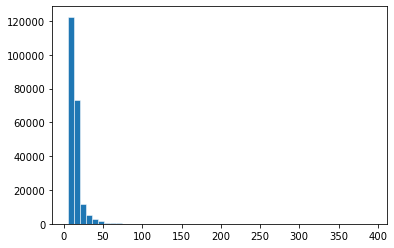

In [72]:
# check the distribution of acquistion_cost
fig, ax = plt.subplots()

ax.hist(acquisition_cost["acquisition_cost_usd"], bins=50, linewidth=0.5, edgecolor="white")

plt.show()

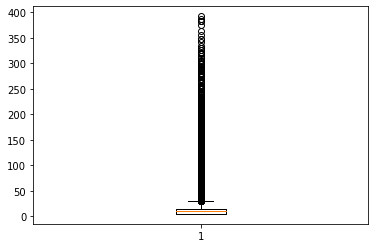

In [73]:
# check the outliers
fig, ax = plt.subplots()

VP = ax.boxplot(acquisition_cost["acquisition_cost_usd"])

plt.show()

### 2. Identity Data

In [74]:
# check the columns and information
identity_data.head()

,Unnamed: 0,event_name,event_id,user_id,timestamp,phone_country,investment_profile_level,origin_funds,country_code,language,user_age,total_wealth_usd
0,0,PhoneUpdated,4a13d85accdd26d599726fd04978e21d,434156f6ec63e56c58024cfa6f675896,2021-07-01 00:02:42.667000+00:00,NL,NaN,NaN,NaN,NaN,NaN,NaN
1,1,EmailUpdated,18cbd11e7a8484b9e2ef5b4e47bf20bc,434156f6ec63e56c58024cfa6f675896,2021-07-01 00:04:30.589000+00:00,NL,NaN,NaN,NaN,NaN,25,NaN
2,2,PhoneUpdated,c8a26c4a6e4978adaa2a4abd16f489e8,cca191bfd8655afe301284820d99928d,2021-07-01 00:04:50.141000+00:00,NG,NaN,NaN,NaN,NaN,NaN,NaN
3,3,PhoneUpdated,b538a4d79f9b68ede481a1b81ed2b69c,2aef9a0fb8ed8c33e1f3e8f1af69400a,2021-07-01 00:05:12.112000+00:00,GB,NaN,NaN,NaN,NaN,NaN,NaN
4,4,AddressUpdated,0e391054785dd688a8498084712c88ac,434156f6ec63e56c58024cfa6f675896,2021-07-01 00:05:23.491000+00:00,NL,NaN,NaN,NL,NaN,25,NaN


In [75]:
identity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123015 entries, 0 to 1123014
Data columns (total 12 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1123015 non-null  int64  
 1   event_name                1123015 non-null  object 
 2   event_id                  1123015 non-null  object 
 3   user_id                   1123015 non-null  object 
 4   timestamp                 1123015 non-null  object 
 5   phone_country             1122837 non-null  object 
 6   investment_profile_level  176802 non-null   object 
 7   origin_funds              176802 non-null   object 
 8   country_code              688280 non-null   object 
 9   language                  188351 non-null   object 
 10  user_age                  870085 non-null   float64
 11  total_wealth_usd          176802 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 102.8+ MB


In [76]:
# drop the columns
# convert str in date
# creat new columns month and year

identity_data = identity_data.drop('Unnamed: 0', axis=1)
identity_data['timestamp'] = pd.to_datetime(identity_data['timestamp']).dt.date
identity_data['month'] = pd.DatetimeIndex(identity_data['timestamp']).month
identity_data['year'] = pd.DatetimeIndex(identity_data['timestamp']).year
identity_data.head()

,event_name,event_id,user_id,timestamp,phone_country,investment_profile_level,origin_funds,country_code,language,user_age,total_wealth_usd,month,year
0,PhoneUpdated,4a13d85accdd26d599726fd04978e21d,434156f6ec63e56c58024cfa6f675896,2021-07-01,NL,NaN,NaN,NaN,NaN,NaN,NaN,7,2021
1,EmailUpdated,18cbd11e7a8484b9e2ef5b4e47bf20bc,434156f6ec63e56c58024cfa6f675896,2021-07-01,NL,NaN,NaN,NaN,NaN,25,NaN,7,2021
2,PhoneUpdated,c8a26c4a6e4978adaa2a4abd16f489e8,cca191bfd8655afe301284820d99928d,2021-07-01,NG,NaN,NaN,NaN,NaN,NaN,NaN,7,2021
3,PhoneUpdated,b538a4d79f9b68ede481a1b81ed2b69c,2aef9a0fb8ed8c33e1f3e8f1af69400a,2021-07-01,GB,NaN,NaN,NaN,NaN,NaN,NaN,7,2021
4,AddressUpdated,0e391054785dd688a8498084712c88ac,434156f6ec63e56c58024cfa6f675896,2021-07-01,NL,NaN,NaN,NL,NaN,25,NaN,7,2021


In [77]:
# replace correct information columns: investment_profile_level, origin_funds, total_wealth_usd

identity_data.loc[identity_data['investment_profile_level']=='investment_experience.no_experience','investment_profile_level'] = "no_experience"
identity_data.loc[identity_data['investment_profile_level']=='investment_experience.novice','investment_profile_level'] = "novice"
identity_data.loc[identity_data['investment_profile_level']=='investment_experience.advanced','investment_profile_level'] = "advanced"
identity_data.loc[identity_data['investment_profile_level']=='investment_experience.expert','investment_profile_level'] = "expert"

identity_data.loc[identity_data['origin_funds']=='funds_origin.salary','origin_funds'] = "salary"
identity_data.loc[identity_data['origin_funds']=='funds_origin.savings','origin_funds'] = "savings"
identity_data.loc[identity_data['origin_funds']=='funds_origin.investments','origin_funds'] = "investments"
identity_data.loc[identity_data['origin_funds']=='funds_origin.family_financial_support','origin_funds'] = "family_financial_support"
identity_data.loc[identity_data['origin_funds']=='funds_origin.mining','origin_funds'] = "mining"
identity_data.loc[identity_data['origin_funds']=='funds_origin.inheritance','origin_funds'] = "inheritance"
identity_data.loc[identity_data['origin_funds']=='funds_origin.pension','origin_funds'] = "pension"

identity_data.loc[identity_data['total_wealth_usd']=='total_wealth_usd.0_to_50k','total_wealth_usd'] = "0_to_50k"
identity_data.loc[identity_data['total_wealth_usd']=='total_wealth_usd.50k_to_200k','total_wealth_usd'] = "50k_to_200k"
identity_data.loc[identity_data['total_wealth_usd']=='total_wealth_usd.200k_to_1m','total_wealth_usd'] = "200k_to_1m"
identity_data.loc[identity_data['total_wealth_usd']=='total_wealth_usd.1m_to_5m','total_wealth_usd'] = "1m_to_5m"
identity_data.loc[identity_data['total_wealth_usd']=='total_wealth_usd.5m_or_more','total_wealth_usd'] = "5m_or_more"


In [78]:
identity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123015 entries, 0 to 1123014
Data columns (total 13 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   event_name                1123015 non-null  object 
 1   event_id                  1123015 non-null  object 
 2   user_id                   1123015 non-null  object 
 3   timestamp                 1123015 non-null  object 
 4   phone_country             1122837 non-null  object 
 5   investment_profile_level  176802 non-null   object 
 6   origin_funds              176802 non-null   object 
 7   country_code              688280 non-null   object 
 8   language                  188351 non-null   object 
 9   user_age                  870085 non-null   float64
 10  total_wealth_usd          176802 non-null   object 
 11  month                     1123015 non-null  int64  
 12  year                      1123015 non-null  int64  
dtypes: float64(1), int64(2), ob

In [79]:
# check the columns and information
identity_data.nunique()

event_name                        8
event_id                    1117304
user_id                      219734
timestamp                       274
phone_country                   122
investment_profile_level          4
origin_funds                      7
country_code                    124
language                          2
user_age                         81
total_wealth_usd                  5
month                             9
year                              2
dtype: int64

In [80]:
# groupby investment_profile-level
identity_data.groupby('investment_profile_level')['user_id'].nunique().sort_values(ascending=False).head()

investment_profile_level
no_experience    69249
novice           60008
advanced         25334
expert           19888
Name: user_id, dtype: int64

In [81]:
# groupby origin_funds
identity_data.groupby('origin_funds')['user_id'].nunique().sort_values(ascending=False).head()

origin_funds
salary                      96179
savings                     40937
investments                 23609
family_financial_support     5916
mining                       3370
Name: user_id, dtype: int64

In [82]:
# groupby phone_country
identity_data.groupby('phone_country')['user_id'].nunique().sort_values(ascending=False).head(5)

phone_country
FR    48539
GB    43614
CH    24975
VN    10632
DE     7707
Name: user_id, dtype: int64

In [83]:
# groupby total_welth_usd
identity_data.groupby('total_wealth_usd')['user_id'].nunique().sort_values(ascending=False).head()

total_wealth_usd
0_to_50k       139118
50k_to_200k     22396
200k_to_1m       9328
1m_to_5m         2298
5m_or_more       1253
Name: user_id, dtype: int64

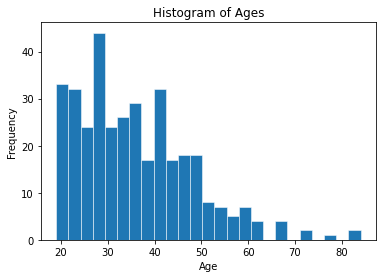

In [84]:
# user_age analysis
identity_data_unique = identity_data.drop_duplicates(subset='user_id')

fig, ax = plt.subplots()

ax.hist(identity_data_unique ["user_age"], bins=25, linewidth=0.5, edgecolor="white")
plt.title("Histogram of Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

In [85]:
identity_data_unique.describe()

,user_age,month,year
count,354,"219,734","219,734"
mean,36,10,"2,021"
std,12,2,0
min,19,7,"2,021"
25%,26,8,"2,021"
50%,34,10,"2,021"
75%,43,11,"2,021"
max,84,12,"2,021"


In [86]:
# calculate total by event_name.
new = identity_data['event_name'].value_counts()
df1 = pd.DataFrame(new)
df1.rename(columns={'event_name': 'total_event'}, inplace = True)
df1

,total_event
PhoneUpdated,221017
AddressUpdated,182824
EmailUpdated,181789
QuestionsUpdated,176802
VerificationApproved,148356
OnboardingCompleted,144857
LanguageUpdated,33857
VerificationRejected,33513


In [87]:
# calculate total by event_name. Indentify duplicates information
identity_data_new = identity_data.drop_duplicates(subset=['user_id','event_name'])
new2 = identity_data_new['event_name'].value_counts()
df2 = pd.DataFrame(new2)
df2.rename(columns={'event_name': 'total_client'}, inplace = True)
df2

,total_client
PhoneUpdated,219734
EmailUpdated,180638
AddressUpdated,177055
QuestionsUpdated,174199
OnboardingCompleted,144140
VerificationApproved,133602
LanguageUpdated,33761
VerificationRejected,23470


In [88]:
# compare number of event x number of clients by event_name
result = pd.concat([df1, df2], axis=1)
result

,total_event,total_client
PhoneUpdated,221017,219734
AddressUpdated,182824,177055
EmailUpdated,181789,180638
QuestionsUpdated,176802,174199
VerificationApproved,148356,133602
OnboardingCompleted,144857,144140
LanguageUpdated,33857,33761
VerificationRejected,33513,23470


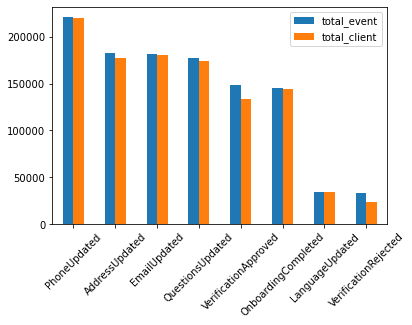

In [89]:
ax2 = result.plot.bar(rot=45)

In [90]:
#identity_data_Aprroved = identity_data[identity_data['event_name'] == 'VerificationApproved']
#identity_data_Aprroved.groupby(['year','month'])['event_name']

In [91]:
# drop duplicate user_id, event_name
identity_data = identity_data.sort_values(by=['user_id','timestamp'])
identity_data = identity_data.drop_duplicates(subset=['user_id','event_name'], keep='first')

identity_data.to_csv('identity_data_clean.csv')

identity_data.head()

,event_name,event_id,user_id,timestamp,phone_country,investment_profile_level,origin_funds,country_code,language,user_age,total_wealth_usd,month,year
957031,PhoneUpdated,5d650c396a779e48c65d90325bddb0d8,0000087e5c27d962f611bc15d9c59ce7,2021-12-06,CH,NaN,NaN,NaN,NaN,NaN,NaN,12,2021
957057,LanguageUpdated,524e613a8656a4ae9552bb7206ed26ec,0000087e5c27d962f611bc15d9c59ce7,2021-12-06,CH,NaN,NaN,NaN,FR,NaN,NaN,12,2021
1053345,PhoneUpdated,5cf7beefcb2a0a37500e5735f958c248,00006df8f5d6d0f0b3dcb11e104fa4b8,2021-12-21,IE,NaN,NaN,NaN,NaN,NaN,NaN,12,2021
1053346,LanguageUpdated,60ac723b3bacf1ddfa1960b54f0c41ce,00006df8f5d6d0f0b3dcb11e104fa4b8,2021-12-21,IE,NaN,NaN,NaN,EN,NaN,NaN,12,2021
1053350,EmailUpdated,4c42936c5d8b6523f26d754f7aa3440c,00006df8f5d6d0f0b3dcb11e104fa4b8,2021-12-21,IE,NaN,NaN,NaN,EN,22,NaN,12,2021


In [92]:
# calculate the days between event_name="PhoneUpdated" and event_name="OnbordingCompleted"
identity_event = identity_data[['user_id', 'timestamp','event_name']]
df1 = identity_event[identity_event['event_name'] == 'PhoneUpdated']
df2 = identity_event[identity_event['event_name'] == 'OnboardingCompleted']
df1 = df1[['user_id', 'timestamp']]
df1.columns = ['user_id', 'times_phone']
df2 = df2[['user_id', 'timestamp']]
df2.columns = ['user_id', 'times_verification']
identity_event = identity_event.merge(df1, on='user_id')
identity_event = identity_event.merge(df2, on='user_id')
identity_event['days'] = (identity_event['times_verification']-identity_event['times_phone']).dt.days
identity_event = identity_event.drop(['timestamp', 'event_name'], axis=1)
identity_event.sort_values(by='days', ascending=False).head(10)

,user_id,times_phone,times_verification,days
775945,dca7de7854c277e5f688e6400e858227,2021-07-02,2022-03-31,272
775946,dca7de7854c277e5f688e6400e858227,2021-07-02,2022-03-31,272
775947,dca7de7854c277e5f688e6400e858227,2021-07-02,2022-03-31,272
775948,dca7de7854c277e5f688e6400e858227,2021-07-02,2022-03-31,272
775949,dca7de7854c277e5f688e6400e858227,2021-07-02,2022-03-31,272
775950,dca7de7854c277e5f688e6400e858227,2021-07-02,2022-03-31,272
775951,dca7de7854c277e5f688e6400e858227,2021-07-02,2022-03-31,272
561972,9fc2b22da557fd8cddee8140cca5abeb,2021-07-11,2022-03-31,263
561976,9fc2b22da557fd8cddee8140cca5abeb,2021-07-11,2022-03-31,263
561971,9fc2b22da557fd8cddee8140cca5abeb,2021-07-11,2022-03-31,263


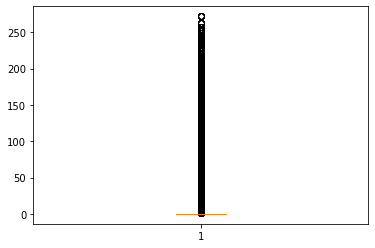

In [93]:
# check the outliers of days
fig, ax = plt.subplots()
VP = ax.boxplot(identity_event["days"])

plt.show()

### 3. Transaction Data

In [94]:
# check the columns and information
transaction_data.head()

,user_id,timestamp,deposit_usd,withdrawal_usd,trade_volume_usd,yield_subscription_usd,yield_redemption_usd,exchange_fees_usd,yield_fees_usd,withdrawal_fees_usd,premium_tier
0,c9cb326a3dfb7ae5874bce170f63e420,2022-02-13,0,0,0,92,0,-0,-0,-0,community
1,c9cb326a3dfb7ae5874bce170f63e420,2022-01-07,0,0,139,0,0,1,-0,-0,community
2,c9cb326a3dfb7ae5874bce170f63e420,2022-01-06,0,0,105,0,0,1,-0,-0,community
3,c9cb326a3dfb7ae5874bce170f63e420,2022-01-03,0,0,85,0,0,1,-0,-0,community
4,c9cb326a3dfb7ae5874bce170f63e420,2021-12-28,0,0,152,0,0,1,-0,-0,community


In [95]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494457 entries, 0 to 494456
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 494457 non-null  object 
 1   timestamp               494457 non-null  object 
 2   deposit_usd             494457 non-null  float64
 3   withdrawal_usd          494457 non-null  float64
 4   trade_volume_usd        494457 non-null  float64
 5   yield_subscription_usd  494457 non-null  float64
 6   yield_redemption_usd    494457 non-null  float64
 7   exchange_fees_usd       494457 non-null  float64
 8   yield_fees_usd          494457 non-null  float64
 9   withdrawal_fees_usd     494457 non-null  float64
 10  premium_tier            494457 non-null  object 
dtypes: float64(8), object(3)
memory usage: 41.5+ MB


In [96]:
# filter the event_name column ('OnboardingCompleted') and drop the duplicates data
identity_data_new = identity_data[identity_data['event_name'] == 'QuestionsUpdated']
identity_data_new = identity_data_new.drop_duplicates(subset='user_id')

transaction_data['timestamp'] = pd.to_datetime(transaction_data['timestamp']).dt.date
identity_data_new['timestamp'] = pd.to_datetime(identity_data_new['timestamp']).dt.date

In [97]:
# merger acquisition_cost and identity_data_new
transaction_data = transaction_data.merge(acquisition_cost, on='user_id')
transaction_data = transaction_data.merge(identity_data_new, on='user_id')

In [98]:
# drop the columns not useful
transaction_data = transaction_data.drop(['event_id', 'country_code', 'language', 'event_name', 'month','year'], axis=1)

# calculate month and year
transaction_data['month'] = pd.DatetimeIndex(transaction_data['timestamp_x']).month
transaction_data['year'] = pd.DatetimeIndex(transaction_data['timestamp_x']).year

# convert date in integer
transaction_data['days'] = (transaction_data['timestamp_x']-transaction_data['timestamp_y']).dt.days.astype('int16')

# calculate the total of yield of clientes
transaction_data['total_client'] = transaction_data['yield_subscription_usd']+transaction_data['yield_redemption_usd']

# calculate the total of revenues (fees of the clientes operations)
transaction_data['total_company'] = transaction_data['exchange_fees_usd']+transaction_data['yield_fees_usd']+transaction_data['withdrawal_fees_usd']
transaction_data.head()

,user_id,timestamp_x,deposit_usd,withdrawal_usd,trade_volume_usd,yield_subscription_usd,yield_redemption_usd,exchange_fees_usd,yield_fees_usd,withdrawal_fees_usd,...,phone_country,investment_profile_level,origin_funds,user_age,total_wealth_usd,month,year,days,total_client,total_company
0,c9cb326a3dfb7ae5874bce170f63e420,2022-02-13,0,0,0,92,0,-0,-0,-0,...,FR,novice,salary,31,0_to_50k,2,2022,169,92,-0
1,c9cb326a3dfb7ae5874bce170f63e420,2022-01-07,0,0,139,0,0,1,-0,-0,...,FR,novice,salary,31,0_to_50k,1,2022,132,0,1
2,c9cb326a3dfb7ae5874bce170f63e420,2022-01-06,0,0,105,0,0,1,-0,-0,...,FR,novice,salary,31,0_to_50k,1,2022,131,0,1
3,c9cb326a3dfb7ae5874bce170f63e420,2022-01-03,0,0,85,0,0,1,-0,-0,...,FR,novice,salary,31,0_to_50k,1,2022,128,0,1
4,c9cb326a3dfb7ae5874bce170f63e420,2021-12-28,0,0,152,0,0,1,-0,-0,...,FR,novice,salary,31,0_to_50k,12,2021,122,0,1


In [99]:
# check the datas
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493711 entries, 0 to 493710
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   493711 non-null  object 
 1   timestamp_x               493711 non-null  object 
 2   deposit_usd               493711 non-null  float64
 3   withdrawal_usd            493711 non-null  float64
 4   trade_volume_usd          493711 non-null  float64
 5   yield_subscription_usd    493711 non-null  float64
 6   yield_redemption_usd      493711 non-null  float64
 7   exchange_fees_usd         493711 non-null  float64
 8   yield_fees_usd            493711 non-null  float64
 9   withdrawal_fees_usd       493711 non-null  float64
 10  premium_tier              493711 non-null  object 
 11  acquisition_cost_usd      493711 non-null  float64
 12  timestamp_y               493711 non-null  object 
 13  phone_country             493709 non-null  o

In [100]:
# check the number of distinct informations
transaction_data.nunique()

user_id                      69399
timestamp_x                    274
deposit_usd                 258026
withdrawal_usd              122870
trade_volume_usd            408595
yield_subscription_usd      115733
yield_redemption_usd         18250
exchange_fees_usd           407500
yield_fees_usd              138960
withdrawal_fees_usd         122850
premium_tier                     4
acquisition_cost_usd         33105
timestamp_y                    260
phone_country                  102
investment_profile_level         4
origin_funds                     7
user_age                        76
total_wealth_usd                 5
month                            9
year                             2
days                           274
total_client                127173
total_company               437215
dtype: int64

In [101]:
transaction_data_new = transaction_data
transaction_data.to_csv('transaction_data_new.csv')

In [102]:
# total of the columns 
pd.set_option('float_format', '{:,.0f}'.format)
transaction_data[['deposit_usd','withdrawal_usd','trade_volume_usd','yield_subscription_usd','yield_redemption_usd','exchange_fees_usd','yield_fees_usd','withdrawal_fees_usd','acquisition_cost_usd','total_client','total_company']].sum()

deposit_usd              1,042,682,375
withdrawal_usd            -489,313,145
trade_volume_usd         1,842,656,376
yield_subscription_usd     396,030,122
yield_redemption_usd       -72,065,383
exchange_fees_usd           11,415,162
yield_fees_usd                  48,051
withdrawal_fees_usd          2,648,784
acquisition_cost_usd        10,819,949
total_client               323,964,739
total_company               14,111,997
dtype: float64

In [103]:
# describe all the columns
transaction_data[['deposit_usd','withdrawal_usd','trade_volume_usd','yield_subscription_usd','yield_redemption_usd','exchange_fees_usd','yield_fees_usd','withdrawal_fees_usd','acquisition_cost_usd','total_client','total_company']].describe()

,deposit_usd,withdrawal_usd,trade_volume_usd,yield_subscription_usd,yield_redemption_usd,exchange_fees_usd,yield_fees_usd,withdrawal_fees_usd,acquisition_cost_usd,total_client,total_company
count,"493,711","493,711","493,711","493,711","493,711","493,711","493,711","493,711","493,711","493,711","493,711"
mean,"2,112",-991,"3,732",802,-146,23,0,5,22,656,29
std,"23,227","12,051","77,937","21,214","7,498",149,1,22,21,"22,404",155
min,0,"-2,923,778",0,0,"-3,275,795",-0,-0,-0,5,"-3,275,795",-0
25%,0,0,31,0,0,0,-0,-0,10,0,0
50%,21,0,221,0,0,2,0,0,18,0,3
75%,545,0,"1,090",0,0,10,0,-0,24,0,15
max,"5,826,211",0,"23,743,588","6,352,583",0,"21,934",189,"1,194",393,"6,352,583","21,934"


#### 3.1 Clients Analysis

In [104]:
# client analysis information: describe all the columns
transaction_data[['deposit_usd','withdrawal_usd','trade_volume_usd','yield_subscription_usd','yield_redemption_usd','total_client']].describe()

,deposit_usd,withdrawal_usd,trade_volume_usd,yield_subscription_usd,yield_redemption_usd,total_client
count,"493,711","493,711","493,711","493,711","493,711","493,711"
mean,"2,112",-991,"3,732",802,-146,656
std,"23,227","12,051","77,937","21,214","7,498","22,404"
min,0,"-2,923,778",0,0,"-3,275,795","-3,275,795"
25%,0,0,31,0,0,0
50%,21,0,221,0,0,0
75%,545,0,"1,090",0,0,0
max,"5,826,211",0,"23,743,588","6,352,583",0,"6,352,583"


In [105]:
# client analysis information: total by columns
transaction_data[['deposit_usd','withdrawal_usd','trade_volume_usd','yield_subscription_usd','yield_redemption_usd','total_client']].sum()

deposit_usd              1,042,682,375
withdrawal_usd            -489,313,145
trade_volume_usd         1,842,656,376
yield_subscription_usd     396,030,122
yield_redemption_usd       -72,065,383
total_client               323,964,739
dtype: float64

In [106]:
# groupby clients information by month and year
transaction_data.groupby(['year', 'month'])[['deposit_usd','withdrawal_usd','trade_volume_usd','yield_subscription_usd','yield_redemption_usd','total_client']].sum()

deposit_usd  withdrawal_usd  trade_volume_usd  \
year month                                                  
2021 7       47,268,331     -11,118,312        30,142,910   
     8      129,623,247     -45,472,721       187,466,918   
     9      125,390,280     -59,997,383       262,660,122   
     10     163,892,348     -78,565,905       305,756,825   
     11     192,938,447     -96,026,054       312,275,378   
     12     157,522,158     -72,895,079       256,969,049   
2022 1      117,371,184     -56,013,797       209,601,937   
     2       63,122,637     -37,584,336       159,266,504   
     3       45,553,743     -31,639,559       118,516,733   

            yield_subscription_usd  yield_redemption_usd  total_client  
year month                                                              
2021 7                  23,037,579            -1,714,402    21,323,177  
     8                  54,018,816            -8,949,474    45,069,341  
     9                  37,935,103            -7,033,153    30,901,950  
     10                 60,074,266           -11,403,128    48,671,138  
     11                 63,681,367           -11,302,345    52,379,022  
     12                 50,234,543            -8,677,224    41,557,319  
2022 1                  52,892,912           -12,187,820    40,705,092  
     2                  30,949,744            -7,315,761    23,633,983  
     3                  23,205,791            -3,482,075    19,723,717

In [107]:
# groupby clients information by premier_tier
transaction_data.groupby('premium_tier')[['deposit_usd','withdrawal_usd','trade_volume_usd','yield_subscription_usd','yield_redemption_usd','total_client']].sum().sort_values(by='total_client', ascending=False)

,deposit_usd,withdrawal_usd,trade_volume_usd,yield_subscription_usd,yield_redemption_usd,total_client
premium_tier,,,,,,
community,"254,948,682","-91,483,621","371,483,216","174,768,234","-34,648,365","140,119,869"
standard,"674,470,682","-365,627,203","818,062,633","111,274,126","-14,899,236","96,374,889"
genesis,"105,827,997","-30,765,122","646,414,886","103,846,476","-22,377,688","81,468,788"
generation,"7,435,014","-1,437,200","6,695,641","6,141,287","-140,095","6,001,192"


In [108]:
# groupby clients information by phone_country
transaction_data.groupby('phone_country')[['deposit_usd','withdrawal_usd','trade_volume_usd','yield_subscription_usd','yield_redemption_usd','total_client']].sum().sort_values(by='total_client', ascending=False).head(5)

,deposit_usd,withdrawal_usd,trade_volume_usd,yield_subscription_usd,yield_redemption_usd,total_client
phone_country,,,,,,
FR,"137,735,965","-37,144,019","435,140,895","92,638,971","-13,170,205","79,468,765"
GB,"414,379,861","-253,727,206","564,554,962","93,133,678","-18,758,561","74,375,116"
CH,"188,658,429","-59,118,169","401,727,575","85,600,035","-15,626,933","69,973,102"
BE,"31,781,111","-10,485,615","92,337,338","23,300,879","-8,203,073","15,097,806"
DE,"65,887,096","-36,654,372","75,567,658","13,562,953","-1,835,967","11,726,986"


In [109]:
# groupby clients information by phone_country
transaction_data.groupby('investment_profile_level')[['deposit_usd','withdrawal_usd','trade_volume_usd','yield_subscription_usd','yield_redemption_usd','total_client']].sum().sort_values(by='total_client', ascending=False)

,deposit_usd,withdrawal_usd,trade_volume_usd,yield_subscription_usd,yield_redemption_usd,total_client
investment_profile_level,,,,,,
expert,"405,136,002","-170,573,679","650,554,502","192,038,487","-32,189,339","159,849,148"
novice,"263,322,496","-142,788,412","506,972,874","83,097,272","-17,816,032","65,281,239"
advanced,"200,160,753","-101,599,649","396,992,443","68,369,836","-11,067,701","57,302,135"
no_experience,"174,063,124","-74,351,405","288,136,556","52,524,527","-10,992,310","41,532,217"


In [110]:
# groupby clients information by orgin_funds
transaction_data.groupby('origin_funds')[['deposit_usd','withdrawal_usd','trade_volume_usd','yield_subscription_usd','yield_redemption_usd','total_client']].sum().sort_values(by='total_client', ascending=False)

,deposit_usd,withdrawal_usd,trade_volume_usd,yield_subscription_usd,yield_redemption_usd,total_client
origin_funds,,,,,,
salary,"415,985,770","-190,544,445","595,854,516","159,624,425","-30,787,951","128,836,474"
investments,"259,356,990","-126,607,866","472,462,110","102,329,013","-15,562,384","86,766,629"
savings,"301,839,605","-143,866,482","585,061,945","95,633,523","-16,690,711","78,942,812"
family_financial_support,"18,099,107","-5,859,114","128,987,705","19,285,185","-4,534,687","14,750,498"
inheritance,"24,408,783","-8,598,011","25,964,035","11,098,278","-1,254,300","9,843,978"
pension,"19,320,320","-11,905,951","30,414,920","6,949,962","-3,067,711","3,882,251"
mining,"3,671,801","-1,931,277","3,911,145","1,109,737","-167,640","942,097"


In [111]:
#groupby clients information by total_wealth_usd
transaction_data.groupby('total_wealth_usd')[['deposit_usd','withdrawal_usd','trade_volume_usd','yield_subscription_usd','yield_redemption_usd','total_client']].sum().sort_values(by='total_client', ascending=False)

,deposit_usd,withdrawal_usd,trade_volume_usd,yield_subscription_usd,yield_redemption_usd,total_client
total_wealth_usd,,,,,,
0_to_50k,"385,426,085","-190,625,798","564,272,806","127,409,210","-25,396,566","102,012,644"
200k_to_1m,"221,262,613","-97,648,752","540,724,576","91,544,725","-16,840,523","74,704,202"
50k_to_200k,"224,568,591","-108,785,334","329,479,775","82,685,072","-16,474,739","66,210,333"
1m_to_5m,"136,757,639","-69,118,871","293,671,142","65,284,704","-11,665,261","53,619,443"
5m_or_more,"74,667,448","-23,134,390","114,508,077","29,106,411","-1,688,295","27,418,117"


In [112]:
#sort the top 10 clients by yield
transaction_data.groupby('user_id')['total_client'].sum().sort_values(ascending=False).head(10)

user_id
32f23402478aa363d46e7bf9135b2f2d   12,606,721
3f3379ebc64bbded932f7f23483753d9    8,212,391
adc4a2a69fe357418ef358a1d1162073    5,849,583
156e8f9435078ece1a9293699fcc1268    5,463,833
9aa76fcdd1f17b36ae9c61f335a14ab6    5,100,151
1eaf130273b085b1c746fa63eafd7c64    5,009,384
c7df73a940f8ed2fbdfdab4ff8cc7da5    4,323,938
193f6a07e9b1a3f22afa7ad05d10e270    4,019,140
9d83a9939c99318e61fbdd5aa4a8f490    3,325,923
596a36bb1b29fd503f60b9ce3c3eb9fd    2,815,578
Name: total_client, dtype: float64

<AxesSubplot:xlabel='trade_volume_usd', ylabel='premium_tier'>

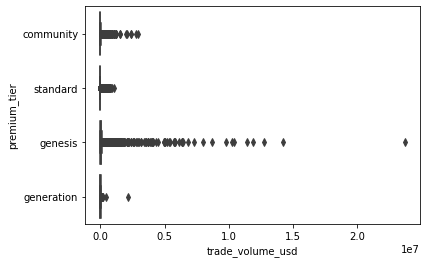

In [113]:
sns.boxplot(data=transaction_data, x="trade_volume_usd", y="premium_tier")

#### 3.2 Company Analysis

In [114]:
# company analysis information: describe all the columns
transaction_data[['exchange_fees_usd','yield_fees_usd','withdrawal_fees_usd','acquisition_cost_usd','total_company']].describe()

,exchange_fees_usd,yield_fees_usd,withdrawal_fees_usd,acquisition_cost_usd,total_company
count,"493,711","493,711","493,711","493,711","493,711"
mean,23,0,5,22,29
std,149,1,22,21,155
min,-0,-0,-0,5,-0
25%,0,-0,-0,10,0
50%,2,0,0,18,3
75%,10,0,-0,24,15
max,"21,934",189,"1,194",393,"21,934"


In [115]:
# company analysis information: total by columns
transaction_data[['exchange_fees_usd','yield_fees_usd','withdrawal_fees_usd','acquisition_cost_usd','total_company']].sum()

exchange_fees_usd      11,415,162
yield_fees_usd             48,051
withdrawal_fees_usd     2,648,784
acquisition_cost_usd   10,819,949
total_company          14,111,997
dtype: float64

In [116]:
# groupby company information by month and year
transaction_data.groupby(['year', 'month'])[['exchange_fees_usd','yield_fees_usd','withdrawal_fees_usd','acquisition_cost_usd','total_company']].sum()

exchange_fees_usd  yield_fees_usd  withdrawal_fees_usd  \
year month                                                           
2021 7                266,888             857               72,566   
     8              1,025,783           2,932              188,368   
     9              1,337,211           3,816              311,447   
     10             1,827,622           7,943              444,625   
     11             2,289,322           9,661              566,816   
     12             1,807,741           8,360              420,557   
2022 1              1,305,304           6,845              286,767   
     2                846,517           4,345              210,596   
     3                708,775           3,293              147,041   

            acquisition_cost_usd  total_company  
year month                                       
2021 7                   568,191        340,311  
     8                   941,568      1,217,084  
     9                 1,097,512      1,652,474  
     10                1,377,067      2,280,190  
     11                1,918,557      2,865,799  
     12                1,868,028      2,236,657  
2022 1                 1,354,022      1,598,916  
     2                   882,756      1,061,458  
     3                   812,248        859,109

In [117]:
# groupby company information by premium_tier
transaction_data.groupby('premium_tier')[['exchange_fees_usd','yield_fees_usd','withdrawal_fees_usd','acquisition_cost_usd','total_company']].sum().sort_values(by='total_company', ascending=False)

,exchange_fees_usd,yield_fees_usd,withdrawal_fees_usd,acquisition_cost_usd,total_company
premium_tier,,,,,
standard,"8,181,561","16,707","2,339,814","9,253,700","10,538,083"
community,"2,831,738","30,425","275,066","1,480,412","3,137,229"
genesis,"366,651",99,"31,921","77,603","398,671"
generation,"35,211",821,"1,983","8,235","38,015"


In [118]:
# groupby company information by phone_country
transaction_data.groupby('phone_country')[['exchange_fees_usd','yield_fees_usd','withdrawal_fees_usd','acquisition_cost_usd','total_company']].sum().sort_values(by='total_company', ascending=False).head(5)

,exchange_fees_usd,yield_fees_usd,withdrawal_fees_usd,acquisition_cost_usd,total_company
phone_country,,,,,
GB,"4,480,678","15,374","1,385,964","2,972,425","5,882,015"
CH,"2,300,918","9,253","307,532","2,647,725","2,617,703"
FR,"1,373,797","8,892","291,877","2,877,947","1,674,566"
DE,"591,449","2,446","159,412","423,228","753,307"
BE,"533,261","1,714","64,039","585,922","599,015"


In [119]:
# groupby company information by investment_profile_level
transaction_data.groupby('investment_profile_level')[['exchange_fees_usd','yield_fees_usd','withdrawal_fees_usd','acquisition_cost_usd','total_company']].sum().sort_values(by='total_company', ascending=False)

,exchange_fees_usd,yield_fees_usd,withdrawal_fees_usd,acquisition_cost_usd,total_company
investment_profile_level,,,,,
novice,"3,495,695","14,360","951,506","3,736,606","4,461,560"
expert,"3,340,969","16,262","515,944","1,554,448","3,873,174"
no_experience,"2,523,206","8,629","665,344","3,844,815","3,197,179"
advanced,"2,055,292","8,800","515,991","1,684,079","2,580,083"


In [120]:
# groupby company information by orgin_funds
transaction_data.groupby('origin_funds')[['exchange_fees_usd','yield_fees_usd','withdrawal_fees_usd','acquisition_cost_usd','total_company']].sum().sort_values(by='total_company', ascending=False)

,exchange_fees_usd,yield_fees_usd,withdrawal_fees_usd,acquisition_cost_usd,total_company
origin_funds,,,,,
salary,"4,694,504","23,826","1,249,078","6,188,512","5,967,408"
savings,"3,716,505","13,181","802,869","2,941,491","4,532,555"
investments,"2,307,640","6,443","449,214","1,166,593","2,763,297"
pension,"279,777","2,973","49,918","158,086","332,669"
inheritance,"215,009","1,206","35,561","116,554","251,776"
family_financial_support,"165,929",218,"48,275","191,687","214,422"
mining,"35,797",204,"13,869","57,025","49,870"


In [121]:
# groupby company information by total_wealth_usd
transaction_data.groupby('total_wealth_usd')[['exchange_fees_usd','yield_fees_usd','withdrawal_fees_usd','acquisition_cost_usd','total_company']].sum().sort_values(by='total_company', ascending=False)

,exchange_fees_usd,yield_fees_usd,withdrawal_fees_usd,acquisition_cost_usd,total_company
total_wealth_usd,,,,,
0_to_50k,"5,013,848","18,285","1,600,470","7,961,398","6,632,603"
50k_to_200k,"2,692,026","15,667","539,723","1,844,092","3,247,416"
200k_to_1m,"2,275,992","9,396","339,281","791,085","2,624,668"
1m_to_5m,"1,029,042","4,027","134,318","169,973","1,167,388"
5m_or_more,"404,254",676,"34,992","53,402","439,923"


In [122]:
# sort the top 10 clients by trade volume
transaction_data.groupby('user_id')['trade_volume_usd'].sum().sort_values(ascending=False).head(10)

user_id
d92e59568ae11a6404e02a001676dcc3   157,500,050
32f23402478aa363d46e7bf9135b2f2d   110,965,483
c420c572ac33575ca35fdba7f2cdc925    95,981,785
c49f028bb4e3a2497a704d7e892836b5    61,713,559
48b3a04b428c30d0ff454718e45bad64    20,379,781
5f6603def8f46a27a4280f8dec709a01    17,904,384
596a36bb1b29fd503f60b9ce3c3eb9fd    16,403,576
ed7034ae1ae292e3706d1cb0dd4ebaaa    15,570,615
16a2da0a599887095142eadb575ff5f8    15,062,536
eeacd62ec771d3738c36ea8a3e74ec50    13,857,988
Name: trade_volume_usd, dtype: float64

In [123]:
# sort the top 10 clients by revenue
transaction_data.groupby('user_id')['total_company'].sum().sort_values(ascending=False).head(10)

user_id
8d17923cb0b2f15f08e1f21ce566feb9   137,358
ed7034ae1ae292e3706d1cb0dd4ebaaa   130,547
f2c695ee68f0a8c499208e460d388465    68,989
69070bebcbd3422e96b3f44adfcd925e    65,627
08aea0153a8252bade9cdc761e1e7ed1    65,294
eeacd62ec771d3738c36ea8a3e74ec50    64,365
e9199cd66c6f865ad3075e7dec6c1463    64,029
adc4a2a69fe357418ef358a1d1162073    55,618
d92e59568ae11a6404e02a001676dcc3    54,479
69b57278c0186c0cb465da93c53de797    53,599
Name: total_company, dtype: float64

In [124]:
#sns.pairplot(data=transaction_data, hue="premium_tier")
#sns.catplot(data=transaction_data, kind="swarm", x="premium_tier", y="total_client", hue="year")

### 4. SQL Challenges

In [125]:
# import pandasql
from pandasql import sqldf

In [126]:
print(sqldf("SELECT * FROM identity_data LIMIT 5;", locals()))

        event_name                          event_id  \
0     PhoneUpdated  5d650c396a779e48c65d90325bddb0d8   
1  LanguageUpdated  524e613a8656a4ae9552bb7206ed26ec   
2     PhoneUpdated  5cf7beefcb2a0a37500e5735f958c248   
3  LanguageUpdated  60ac723b3bacf1ddfa1960b54f0c41ce   
4     EmailUpdated  4c42936c5d8b6523f26d754f7aa3440c   

                            user_id   timestamp phone_country  \
0  0000087e5c27d962f611bc15d9c59ce7  2021-12-06            CH   
1  0000087e5c27d962f611bc15d9c59ce7  2021-12-06            CH   
2  00006df8f5d6d0f0b3dcb11e104fa4b8  2021-12-21            IE   
3  00006df8f5d6d0f0b3dcb11e104fa4b8  2021-12-21            IE   
4  00006df8f5d6d0f0b3dcb11e104fa4b8  2021-12-21            IE   

  investment_profile_level origin_funds country_code language  user_age  \
0                     None         None         None     None       NaN   
1                     None         None         None       FR       NaN   
2                     None         None        

In [127]:
# total user by event_name

q = """
      select
        event_name, count(*) as "number_user"
      from identity_data
      group by event_name
      order by number_user desc;
        
"""
#print("*" * 80)
#print("aggregation")
#print("-" * 80)
#print(q)
print(sqldf(q, locals()))

             event_name  number_user
0          PhoneUpdated       219734
1          EmailUpdated       180638
2        AddressUpdated       177055
3      QuestionsUpdated       174199
4   OnboardingCompleted       144140
5  VerificationApproved       133602
6       LanguageUpdated        33761
7  VerificationRejected        23470


In [128]:
print(sqldf("SELECT * FROM transaction_data LIMIT 5;", locals()))

                            user_id timestamp_x  deposit_usd  withdrawal_usd  \
0  c9cb326a3dfb7ae5874bce170f63e420  2022-02-13            0               0   
1  c9cb326a3dfb7ae5874bce170f63e420  2022-01-07            0               0   
2  c9cb326a3dfb7ae5874bce170f63e420  2022-01-06            0               0   
3  c9cb326a3dfb7ae5874bce170f63e420  2022-01-03            0               0   
4  c9cb326a3dfb7ae5874bce170f63e420  2021-12-28            0               0   

   trade_volume_usd  yield_subscription_usd  yield_redemption_usd  \
0                 0                      92                     0   
1               139                       0                     0   
2               105                       0                     0   
3                85                       0                     0   
4               152                       0                     0   

   exchange_fees_usd  yield_fees_usd  withdrawal_fees_usd  ... phone_country  \
0                  0    

In [129]:
# acquisition cost and revenues by clients
q = """
      select
        phone_country as "country", user_id, avg(acquisition_cost_usd) as "avg_acquisition_cost", avg(total_company) as "avg_reveneus"
      from transaction_data
      where days <= 90 
      group by user_id
      order by avg_reveneus desc;
        
"""
#print("*" * 80)
#print("aggregation")
#print("-" * 80)
#print(q)
print(sqldf(q, locals()))

      country                           user_id  avg_acquisition_cost  \
0          GB  35fa184ceb88eabc6379b29b870812f5                    10   
1          PT  aa1f721eefb95c0bb315ed59b9ebeb71                    17   
2          BE  e38ba8b62893ed656435e659599f1611                    15   
3          GB  fa36319a000ef488de8d59852b16a254                    10   
4          CH  8a7bc6f7350131816c620a54727c76d6                    20   
...       ...                               ...                   ...   
67416      GB  00862ef80dbf7d4f8b6b7fe3c0d6bcda                    20   
67417      GB  00802169dfac0331b158253a77fd1e1f                    17   
67418      FR  00689495914b5d12ddb302bae979773c                    15   
67419      PT  0047b3f201f68fc1d3ddef2ea12bd279                    15   
67420      FR  002511fe35564ca8e2569c5fd48bdb8c                    15   

       avg_reveneus  
0             9,125  
1             7,361  
2             7,130  
3             5,569  
4            

In [130]:
# acquisition cost and revenues by country
q = """
      select
        phone_country as "country", avg(acquisition_cost_usd) as "avg_acquisition_cost", avg(total_company) as "avg_reveneus"
      from transaction_data
      where days <= 90
      group by phone_country
      order by avg_reveneus desc;
        
"""
#print("*" * 80)
#print("aggregation")
#print("-" * 80)
#print(q)
print(sqldf(q, locals()))   


    country  avg_acquisition_cost  avg_reveneus
0        UY                    16           153
1        HK                    11           117
2        NO                    19            89
3        MZ                    17            76
4        GI                    12            76
..      ...                   ...           ...
98       NP                    10             1
99       JM                    10             0
100      AM                     5             0
101      FJ                     5             0
102      BM                     5             0

[103 rows x 3 columns]
